In [1]:

import cv2
from cv2 import imread
import numpy as np
from PIL import Image


In [2]:
def de_blur(image_2d, threshold=100):
    lp = cv2.Laplacian(image_2d, cv2.CV_64F).var()
    if lp < threshold:
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        image_2d = cv2.filter2D(image, -1, kernel)
    return image_2d

def de_noise(image_2d):
    gray = cv2.cvtColor(image_2d, cv2.COLOR_BGR2GRAY)
    image_2d = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 55)
    return image_2d

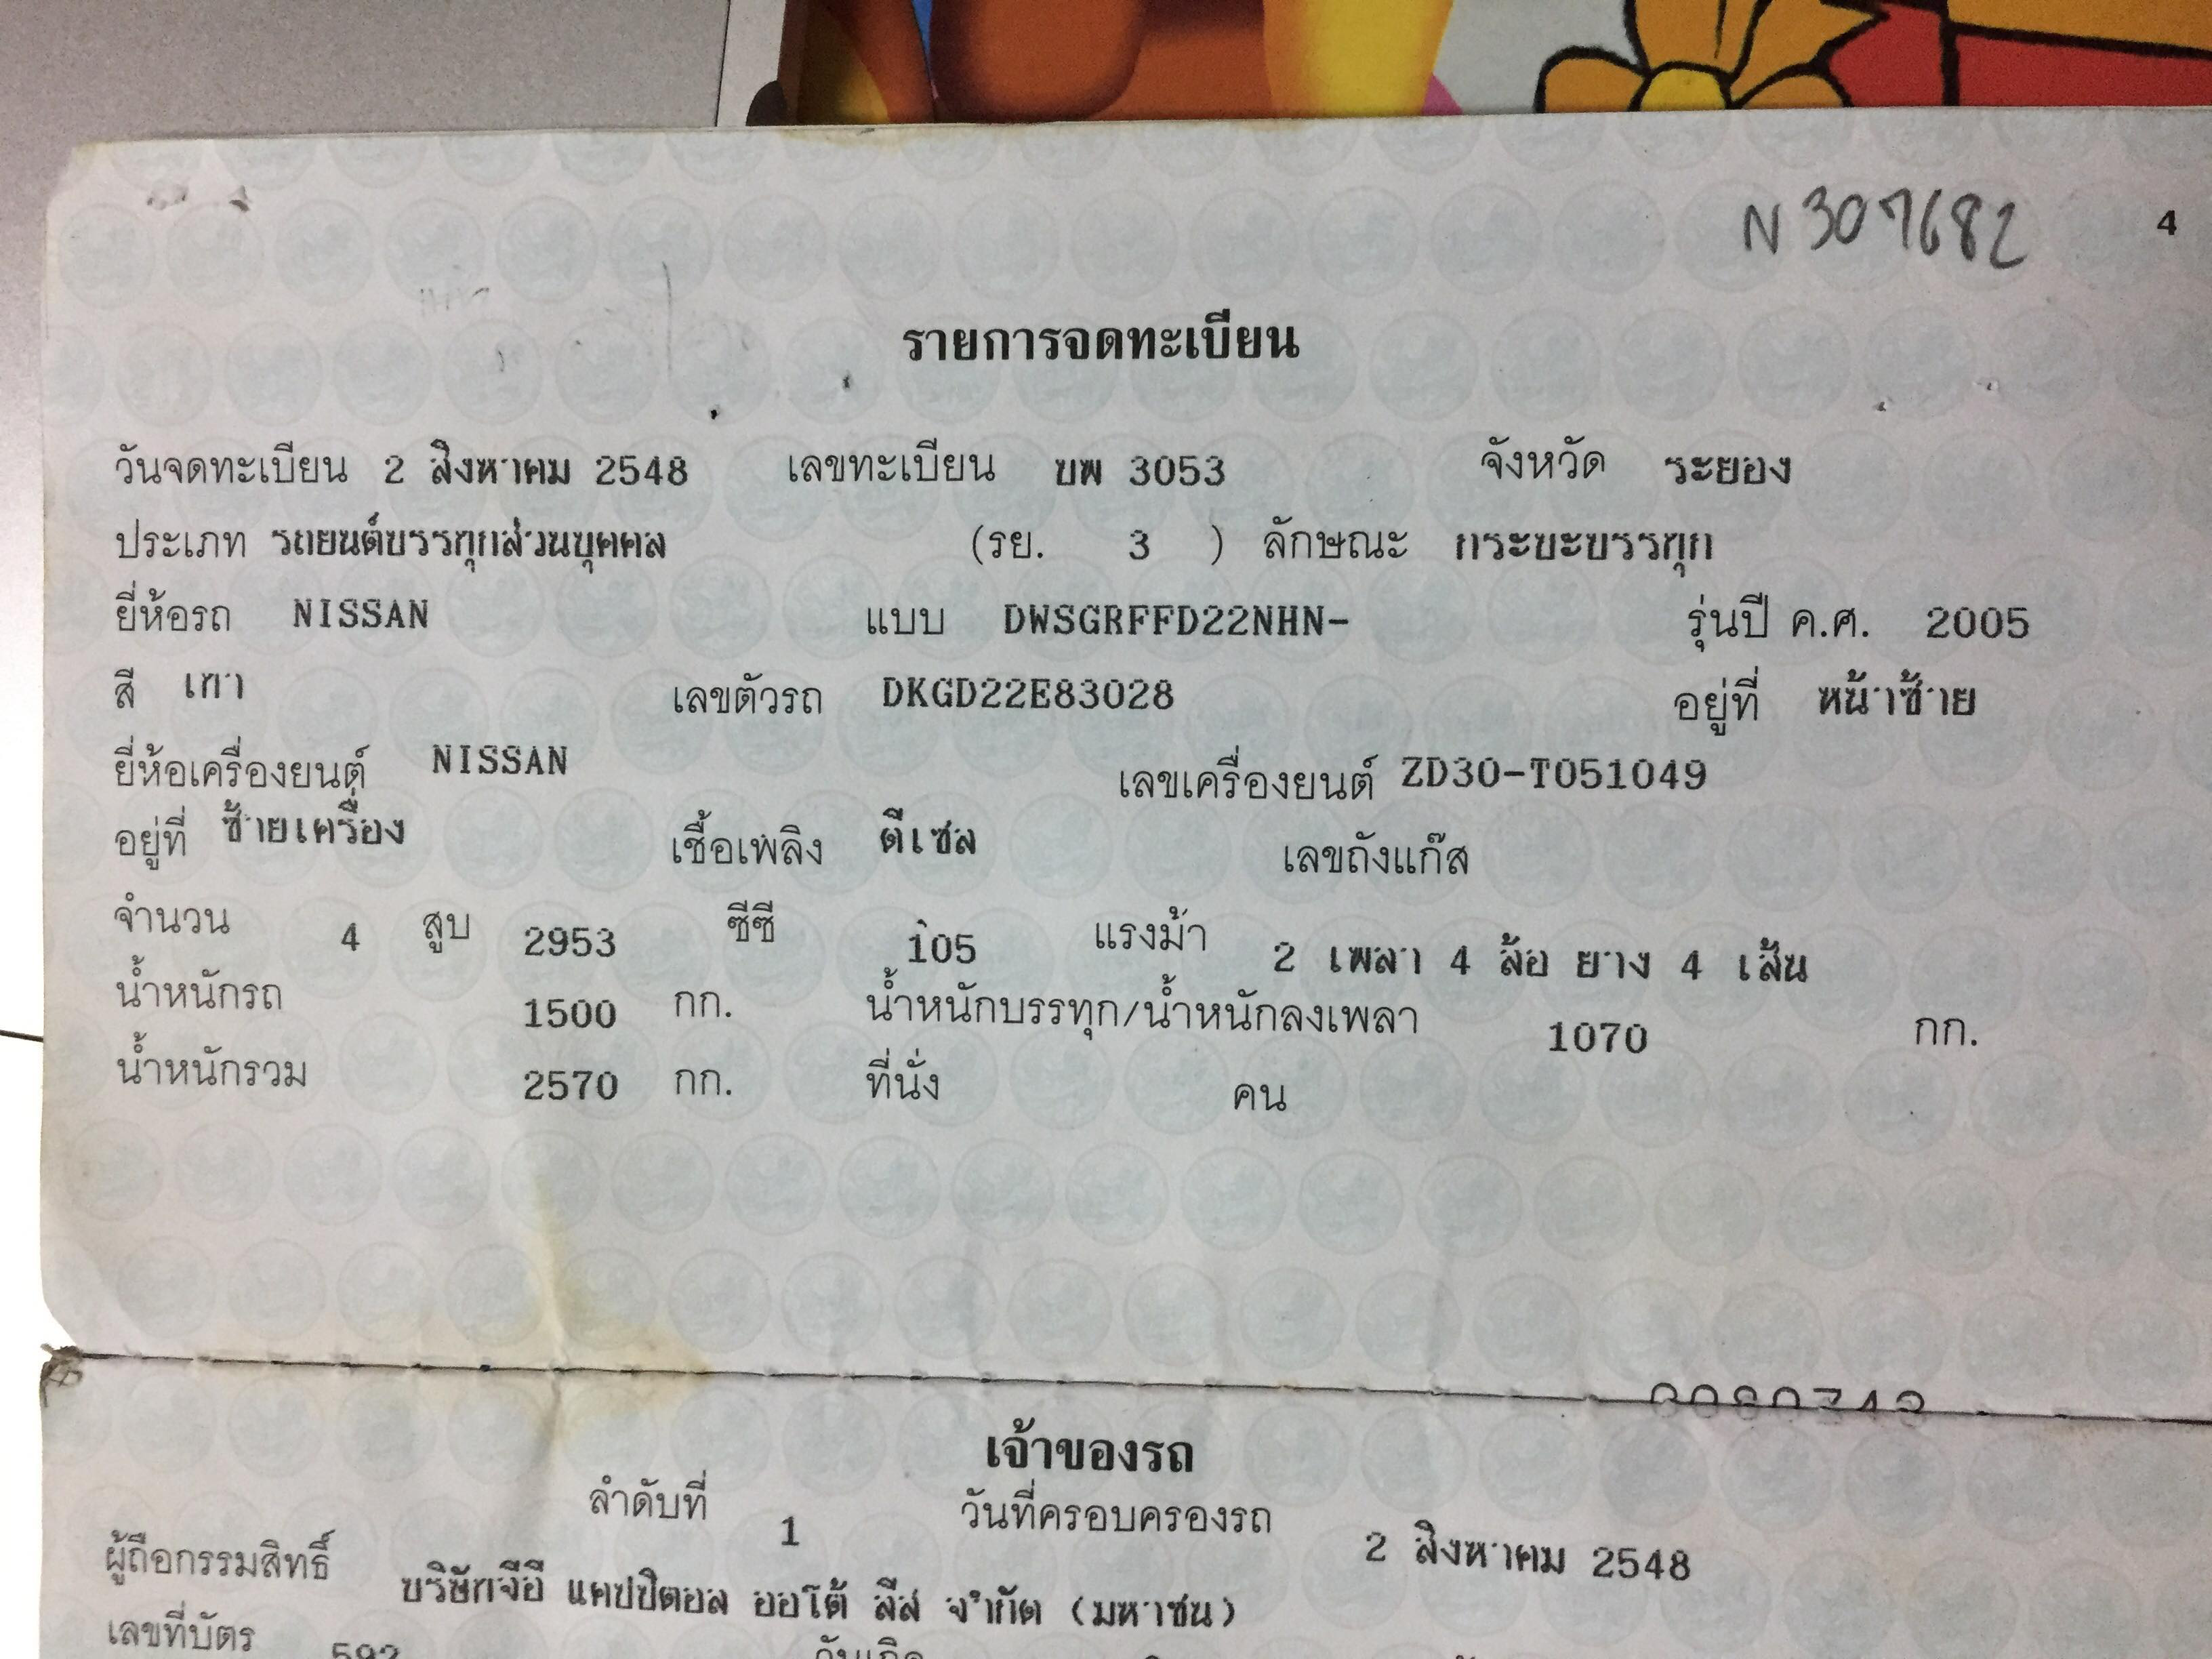

In [3]:
image_file='privacy_resource/ocr1.jpg'
Image.open(image_file)

In [6]:

image2d = cv2.imread(image_file,100)
deblur_data = de_blur(image2d)

In [8]:
image2d

array([[[130, 137, 152],
        [125, 132, 147],
        [123, 130, 145],
        ..., 
        [ 25,  82, 143],
        [ 32,  87, 148],
        [ 33,  87, 148]],

       [[130, 137, 152],
        [128, 135, 150],
        [127, 134, 149],
        ..., 
        [ 33,  90, 151],
        [ 33,  88, 149],
        [ 37,  91, 152]],

       [[130, 137, 152],
        [129, 136, 151],
        [129, 136, 151],
        ..., 
        [ 31,  88, 149],
        [ 32,  87, 148],
        [ 31,  85, 146]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [155, 161, 168],
        [154, 160, 167],
        [151, 157, 164]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [157, 163, 168],
        [153, 159, 164],
        [152, 158, 163]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [157, 164, 167],
        [157, 164, 167],
        [162, 169,

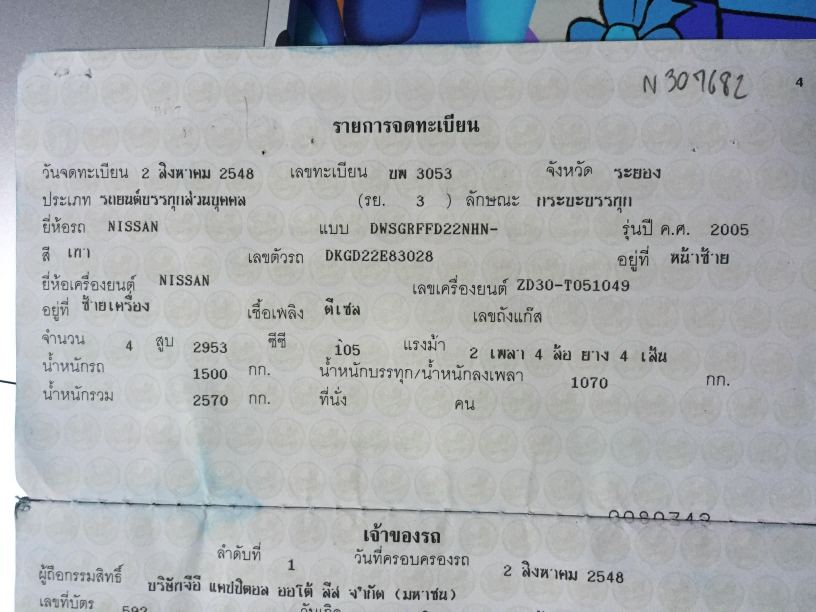

In [7]:
Image.fromarray(deblur_data)

In [5]:
deblur_data.shape

(612, 816, 3)

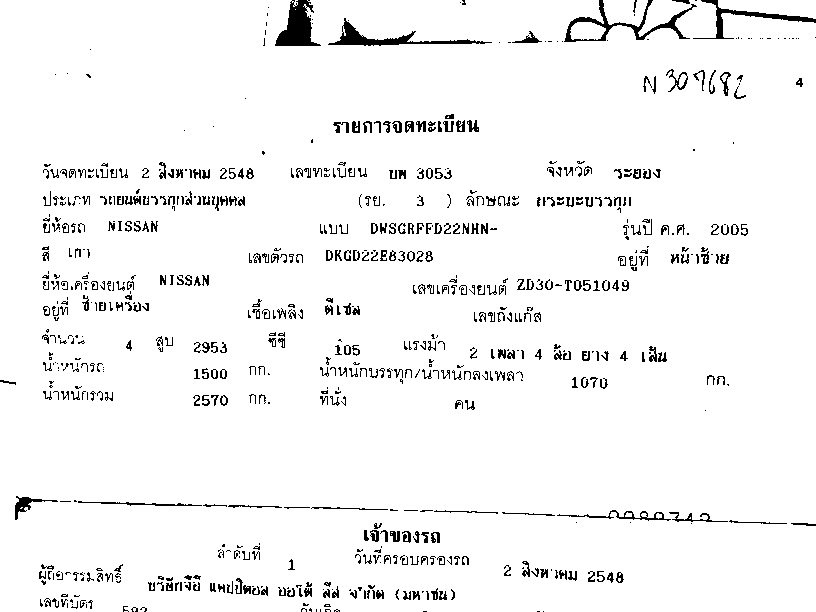

In [6]:
denoise_data = de_noise(deblur_data)
Image.fromarray(denoise_data)

In [9]:
image_base64 = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAFLAfQBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APf6KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKjnnhtbeW4uJY4YIkLySSMFVFAySSeAAOc1n6Dr9j4j01L6waTYUiZ0kXa0ZkiSVVPbOyRDwSOcZ4rUoooooooooooooooooooooooooooooooooooooqnYarY6m94ljcxzmyuDa3GzkJKFVimehIDDOOhyDyCBcoooooooooooooooooqOeeG1t5bi4ljhgiQvJJIwVUUDJJJ4AA5zXkfiX48Wem+HlvNN0O++3S3dxZCHUVEPkSRIhYuqkk4MqDbwThuVwM0/C3xvh8R+J9Lt755NMto7ci5WNAy3ExjDM7ZVjFBGUl535+ZGb5Q+32iCeG6t4ri3ljmglQPHJGwZXUjIII4II5zXzx4k+LF94tkk8HWMMcWoX17DaxX1vef6PbypeExyRMqb3BURZfI5GVRf4vR/AunNo+v69DpdzJqGlpe2ullTOuLUW9igaU44Z2by42UAEFcnpgegCRjcPEYZAiorCUldrEk5Uc5yMAnIA+YYJ5xTGs2f8AaN3Zs+z7L5KyTOQI/MlJCxBs/wCs+4dvXEsfXcK4/wAU+Of7L8Lwz6Tc/wBp6zq/On2unf6UrbCizrBIkZB2DewZ1PzZypA2Dj/AHifxTNdJfXosfO1jVXs4bWFi32rbL5k9zvaTa0cMIeJGj3ZxGrbgiV7hRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRXi/wC8S2+tf8JOLhvL1e71BtRlhWQiMpJ3jQscYbIY46NGCTxj2iiiiiiiiiiiio5JGR4VWGSQO+1mUriMbSdzZIOMgDjJyw4xkivealDZpOQslxLAiSS29uA8qxsxG/ZnJHyucDJOxgoY8VcooqvfzXFvp1zNZ2v2u6jid4bfzBH5rgEqm48Lk4GT0zXz54z+KM3ib4W2up6dqElnqm86bq9hCpMBjnSTn51wSRBlSpJQOwzzmvC66z4feGtX8Sa9OdBuI4dW0y3/tG0DgESSRyR4XJ4B+bIzkZABwCSPq/wANPNo3w00h7iyu2nstHhMlpHETOWSEZQIcHfkYxxzxXB/Cv4T2fhnUU1XU4L7+3rHzImcyD7IWYsoaLADN+6Kkk5X94R95WCd5p3hSHwt4KuND8KCO0uBbyfZ7ibDFrgrgSyHB3HdgngjAAAwAK2JxNp2jSiwtpLye3tz5EElwd0zKvyqZHJOSQBubPXJzXP8AgzwzfaV4f1G18RHTbu41O9uLu5itYMQYmPzIdwzIOvL84IXkKKLXRW0fSdMudH0COC9063exg0wXapAElmi8xzJtYkDyvMDEbmBOV3nAk8JeCdL8OaHokL6bYtqen2giN2se91c5MmyRhuCl3kOOPvHgdK6is/U9UTTJ9NSUwLHeXYti81wsW0lHK7Q332LKqhRz82egNaFFFFFFFFFFFFFFFFFFFFFFFZ9rruj32oz6dZ6rY3F9Bu862huEeSPadrblByMEgHPQ1JqWrabo1utxqmoWljAzhFkupliUtgnALEDOATj2NcPc/G3wRZeILnSrjUJAkCBhfRIJ7eUkKdqNGWJPzc8AZUjPTPSaJ458LeI/IXSdesbiafd5dv5oSZtuc/umw44BPI6c9K6CiiiiviT4f6q2i/EHQL9bmO1RL2NJZpNoVYnOyTJbgDYzc9uvHWvtuiis/XNZs/D2h3ur377LW0iaV8EAtjoq5IBYnAAzySBUfh7xDpvifRoNU0u5jmglRSyq6s0TFQ2x9pIVwGGRnitSiiiisvW9Xn0e38+HRNS1NAjvILARMyBRn7rupYnnAUMTj6Zw9Q+IelrZ3EekPBea3HLHDFpF7P8A2fPK7FMALOFb7rgj5eeg5rU1a815rfTxodpaJeSustxBqe9VWEAb08yIOqy5ZQPvA4YgMFNSaBdajfRTXOoW89lI2wPYTopNtIFG4JKvyyxnKkEZIJYE5+RNiiiuX+Iz3CfDrXvsybt1oyTEKGKQHiZ1UsoLLGXYDcMkAV4J4F0/Tda8NLZzQR6xq11pl7pumxiBcWE2JZ1WUucAtgvFIvOXmUnCDb5HX0/8HLS30PWL7QrLRZ4JItKsZ9WvLmQiT7XIrSCLyyfuhZCBhVIMbBtxINewUUUUUUUVTvdKsdReOW6to3niSRIZx8ssIddr+XIMMhI4ypBq5RRRRRRRRRRRRRRRRRRRRXlfxF+K/hyx0RtO0nWdNvdQu3iXGz7VaiEv+884qCChRXUquXwwwOcjwzU/HerTaw2qy63/AGxa3Ut2f7KunuBHAkivFho92EykrbRHI20cE+vP/wDCWeJP7R/tH/hINV+3eV5H2n7bJ5nl53bN2c7c846ZrPmv7y4s7azmu55LW13fZ4XkJSLccttU8Lk8nHWq9FbFj4s8SaZZx2dh4g1W0tY87IYL2SNFySThQcDJJP41qaf8SvFun3EM513Urp4riOcC5vp3VghJMbLvAZGyNwIz8owRznQ0r4weMtLure4bU5L0wvuZLuSR0lAi8tVZQwGACW4wWY7nLELjQ1T45+LdS8Pto6C0sUKIi3Vo863ChSDxI0pJJ24JOSQTnrXnd9f3mp3kl5f3c93dSY3zTyGR2wABljycAAfhVevt/wAC3/8AafgHw/eG7+1ySafB5sxk8wtIEAfc3dgwYHPOQc810FFc/wCLvCcHjLR20m91G+tbGTHnRWnlDzcMrLkujEYKg/KR1Oc1c0Dw5pHhbS103RbGO0tA5fYpLFmPUszElj0GSTwAOgFalFFFFZ+qaNZ61Z3djqafa7C6iWKS0kA2DBJ3AgbgxyOc8bFK4OSa9n4W0az0M6ILP7Rph2j7LeyvdIAuNqgSlsKNq4UcDGQK2KKKKKjmhWdAjmQAOr/JIyHKsGHKkHGRyOhGQcgkV4v8RPDd34N1uy8T6BrMlhFd6nIZ4zp6XZtGmQtc3KFgWxsgBKgcAPggEivONY8Cm+1e51VbOOy0m6t766s4LaKRZzMJzFHbNCVO2VZpoIiqgJtHysSCx+j/AAfq7ar4V0LVJ7+S7l1CygWTyo1aNZwjNIxKL8hLBlO4hQVCgAnB6Sq6WNvHqM1+seLqaKOGR9x+ZELlRjpwZH/P2FWKKKKKKjjghheZ4oo0eZ98rKoBdtoXLep2qoyewA7VJRRRRRRRRRRRRRRRRRRRXifx2+I02jW48LaRc2jT3tvImpAoXkgjYLtAOdoLKXyCCQCCMZBr5sooooooooooor3/APZ+8Y67cf8AFK/2Z9q0m23S/bVYJ9jVtzbW4+fc/QZDDLHkD5foCiiiiiiiiiiiiiiiiq9/9s/s65/s7yPt3lP9n+0Z8vzMHbvxztzjOOcV82aPC32fxh8JbUxsl67X+jXIkWVrkqI5o0LKdmJIo0YNlQvOc5AH0H4UvbzUPCWk3WopOl+9pH9qE8BhcTBQJMoQMfMD2weo4xVfxwmly+C9Ug1l4EsZ4vIZ522IruQkZL7W2YdlO8qdv3scV0FFFFFFFFFFFFFFFFFFcP4x+LHhbwTefYb+ee5vxtL2lnGHeNWBILEkKOg4zu+ZTjBzUfgz4ueGfG+qPplgbu1vAm+OK9RUMwGd2zazAkAZI4OORkA47yiiiiiiivF/EX7PFhrGoyX9r4kvobq4lkmunu4I5vMdjnICeWF5LevUYxjnH/4Zl/6m7/ym/wD22sSf9m/xUtxKtvqujSQByI3kklRmXPBKhCAcdsnHqauaZ+zXrEvm/wBreILG1xjy/skL3G7rnO7Zjt0znJ6Y56PTf2bNBit2XVNc1K5n3kq9qqQKFwOCrByTnPOe44451LH9nnwVaXkc80uq3sa5zBPcKEfII5KIrcdeCOnpxWx/wpL4ef8AQvf+Ttx/8cqxY/B/wDp95HdQ+HIHkTOBPLJMhyCOUdip69xx161sf8IJ4P8A+hU0P/wXQ/8AxNH/AAgng/8A6FTQ/wDwXQ//ABNakOk6bbaWdLg0+0i08oyG0SFViKtncNgGMHJyMc5NZf8Awgng/wD6FTQ//BdD/wDE14hpn7NesS+b/a3iCxtcY8v7JC9xu65zu2Y7dM5yemOfd/DHhjS/COhw6RpEHlW8fLM3Lyuerue7HA/IAAAADYooooooooooooooooory/4p+Grex0E+KtN06A3+g/YprGOG3PyJBKxKNg/6kLIWKqFxsyWIAC9Z4Bv9F1LwRpl14dsZLHSSjpb28ihWUK7Kc4JySyk5ySc5PJNbGo6bDqSW4laSN7e4juIpIiA6sjZwDjgMu5Gx1V2HerlFFFFFFFFFFFFFFFFFY/iHwroXiuzFrrmmQXsa/cLgh48kE7XGGXO0ZwRnGDxXjfiP9m9Zri8ufDutRwI7hrexu4mKoCRlTKCTgc4+UnoCTy1dx8M7j4iQodL8a6VGtvBbjyNRNzG8rsGxtkCu24lT97A+5zuLZr0Siiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiqep6cup2Uls1zd2xZHVZrWdonQsjJuBHBIDEjIIBAOMgEeT/BPTToniXxpozWcdu+nPa2xdUkQ3O0z4mZXZsF1w3ykLgjA9fYJp4bZA88scSF1QM7BQWZgqjnuWIAHckCiGeG5QvBLHKgdkLIwYBlYqw47hgQR2IIqSiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiioxPC1w9ussZnRFd4ww3KrEhSR1AJVgD32n0qSiiuLsdHtvB/jeWWzWQ2nie4dpEECN5V2qPKWMpcPsZVkITawDZIKA4PWX8rwadcyxNskSJ2VvIabBAJB8tCGf8A3VOT0HNFhfW+p6dbX9nJ5lrdRJNC+0jcjAFTg8jII61YooooooooooooooooooooooooooooooooooooooooooooooooooooooorP1O01G48qTTdU+xzRZ+SS3WaGXOP9YvyvwM42uvJ53DitCiiq72u/UYbz7ROvlRSReSr4jfeUO5l7sNmAewZvWrFZfhqzh07wrpFlb3cd5Bb2UMUdzHjbMqoAHGCRggZ6nr1NalFRwwQ2yFIIo4kLs5VFCgszFmPHcsSSe5JNSUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUVHNPDbIHnljiQuqBnYKCzMFUc9yxAA7kgVJRRWffa7o+mRSS3+q2NpHHKIHee4SMLIVDhCSeGKkNjrg56VycHxn+H1zcRQJ4ijDyOEUyW0yKCTjlmQBR7kgDvXSWfizw3qEpisvEGlXMg25SG9jcjcwReAe7Mqj1LAdTWxRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRUc8EN1by29xFHNBKhSSORQyupGCCDwQRxivH/Gfhnx+16mleEbaPTdPL+XFd6XffZLeO3Zw+2S3ySsquCTLFgsrEYOdo6D4eeE/HXh12bxH4uj1K3Z3zaMr3BOVXDLO5V1II+7grjPc5HSeOi6eAfEEsU88E0OnzzRywTNE6OiFlIZSCOQO/PQ5BIr4kknmmSFJZZHSFNkSsxIRdxbC+g3MxwO5J71HRX1H8B/HLeIfDT6Dfyxm/0lESHAVTJbYCrxnJKkbScAYKZySTXrlFFFFFFRwTw3VvFcW8sc0EqB45I2DK6kZBBHBBHOakoooooooooooqOQzB4RFHGyF8SlnKlV2nlRg7ju2jBxwSc8YMlFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFYfjSCa68C+Ibe3ikmnl0y5SOONSzOxiYAADkknjFfDlaDTaOdOkRbG+F8dnlzG8QxrgLuynlZOSHI+YYDKOdpLZ9dx8I/ENx4e+JWkvAu+O/lWwnTIG5JWAHJBxhtrcYztxkAmvseiiiis/Vtc0vQbOW61S/gtYYommYyPg7FKgkL1bl0HAPLKOpFfInjP4n+I/GWqJcTXclnaW1x59la27bRbsMbW3DBZxjO49CW27QcVyf2+8/tH+0ftc/27zfP+0+YfM8zO7fu67s8565roLH4j+NdPvI7qHxRqryJnAnuWmQ5BHKOSp69xx1617n4B+OS+J9Z0zRNUs7S0u7lHEtyZmjjaXc2yONCGySuzlnXJ3Ac7Q3slFFFFFFFFFFFFFFFFFFFFFFFFFFFFFc3418Xw+DNGhvX0+7v57m4W0tba1UFpJmViinuASuMgE8jANeCP+0Z4sF5dSQ2GlfZ5ZS8MU0TuYUwAE3Ky7umSSOST0GAPp+iiiiiiiiiiiiiiiq9rf2d95/2O7guPIlaCbyZA/lyL95Gx0YZGQeRXyx8YfhrceEdYuNbtEgGhX92RAkbANA7LvKFAoAXIfbtzhVAJBxnzOeea6uJbi4lkmnlcvJJIxZnYnJJJ5JJ5zUdblpY3PhrxLYNr1rqWlmJ1uQGtXWXCklSql4mwWXGQ6kckHIr7T0S8uNQ0eC9uRAGuN0sYgcOoiZiYssCQW2FNxUlS2dpIxWhRRRXzZ+0brt9N4l0/QWSSKwt7cXS5bid3JXfgMRhQpUZAIJfqCCfL/Ct14cttUlHijT7u80+W3eIG0l2SwSHG2RQSAxGMYbj5s4OMHoPGEnw8VL9NA0rxBp2qB1iFpqCKYoCrAOB+83q/wAp+9vHLDaOCvJ6Vaadd/bf7R1T7B5NpJLb/wCjtL9omGNsXH3d3PzHgYr2j4h6l4d8K/B608HaBNBJcXcsYuw1vJFJLsw0kxDcq3mIqEMTtKvH1jIX6DgEy28S3Ekck4QCR40KKzY5IUkkDPbJx6mpKKKp3OrabZ3EdvdahaQTyPGiRyzKrMzlggAJySxRwB32nHQ1coooooooooooooooooooooooqnquq2Oh6XcanqdzHbWdum+WV+ij+ZJOAAOSSAMk18efFDxPb+LviBqOqWM881gdkVqZsjCKoB2qfuqW3MBx97JAJNcfX3/RRRRRRRRRRRRRRUZhVrhJyZN6IyACRguGIJyucE/KMEjI5xjJz5H4q8XeJtE8X6j/AGd4B1y/uIci3vINQvJbN8x4VjAEEZwCNyj+IH5s/NWPo37ROl6ns0/xRoHkWs8QiuJ4X8+Ni2FbdERkRkFiRlzjjDZqhqeofAuTUYhY+H77Vrq9lIEOmJcJtckYUIzoOScBUB6YwOK9f0Pwh4Ths7K5tPCdjZzW+3y/PsUE8LoccuQSWBX74Y7vvBmBBPk/iBNG8d/HSxktbOfUtG0yJZNRvbUPdxSFY2lSMAF08slQuxVBZmkHJINe2aNqui3olsNGubSRLBIkMNtjbEjxq8W0DjYUI2kccEDoQNSiisfxPqV/pehzT6VZ/a9Qb5II2jkZAepd9iltqqGbA5bAVfmZQfjzVLHWte8Y3Wjw2V293avNb22mtcm4a2ih3t5CMSdwRVYADrjgEmsO6sLyx8j7ZaT2/nxLPD50ZTzI2+6656qcHBHBqvUkEzW1xFOgjLxuHUSRq6kg55VgQw9iCD3r1jwXoniP4v8AxBXxLrXlvptncI9w0se6DapDC2jQ8EEdR2DFmyWG76jooooooooooooooooooooooooooorz/wCKXxKt/AWjrHavBNrtxtNtayKXUJu+Z5AGBC4DAc8t0BAbHhFxq/xF+MWo3kVks89ukSedY2k3kWiKD8uQ77SxYFvmJY4OOF49H8I/s7adZ7bnxXef2hNz/odozJCPvDl+HbgqeNmCCPmFe0WNhZ6ZZx2dhaQWlrHnZDBGI0XJJOFHAyST+NWKKKKKKKKKKKKKKK5/xw1wngvVHtYZ5ZliyPI1AWLoARucTnhNoy3PB24IIOK8M8KeKPiz4wvdQS2160eDR3Se63RoUkKvuEam2QvIG8tuE4YAjPzAHo/AXgTxDpHiG01iy8OeFLS3G0PcsNQWYRs5WQRxztuSQKp5ZQCHGCQWr0i6+HPg678g/wDCO2NtJBKs0U1jH9lkR16EPFtbjr16gHqBVjUNIurO1M2g20F3qQ2iE6vfzvHAViaNZFyHIbDYbbtLhmy2ep4U8HaX4Os7i30zzz9plM07SPwzkk5EahY04IHyKvCqDnArLtNVaXxj4r07TotGh1gWUM8KyIqzO481F+0FHYug2xMOFKpMoIBNdpRWH4s1q50LQZ7yzgjlnCSBPNDlEcRuyFyowqblUMzsiqCSXGADwfwx1nxF428Pal4h1F4LjU4pZhpIlMYtLdihAGyM+YGBOCXy3lsNp+d84/wQ8KapDp1rqeqaLpUUdrdzLbTPB5V+hAeOTcyj5lDbk8uQZ5JyAiBvXNf8OaR4p0ttN1qxju7QuH2MSpVh0KspBU9RkEcEjoTXn/iH4HeCNcuJ0sPM0nUAjTMlpKGUGQnYzRNnCblbAXYDhgDxxX0r9njwhZPby39zqWoOiYljeVY4pW24JwgDqM8gb+wyTzn1DStKsdD0u30zTLaO2s7dNkUSdFH8ySckk8kkk5Jq5RRRRRRRRRRRRRRRRRRRRRRRRRRXj/iT4j6z4v8AL034Tie9uoMT3t/5SRxxocqIsTqAWJ+btwvGfm21/D37PmnR3h1HxZqs+s3Uv7yWFC0aNIwO/dJnfJ8xBDfIeOQc4r2CxsLPTLOOzsLSC0tY87IYIxGi5JJwo4GSSfxqxRRRRRRRRRUccjO8ytDJGEfarMVxINoO5cEnGSRzg5U8YwTJRRRRRRRRUc8bTW8sSTSQO6FVljClkJH3huBGR15BHqDXB+IE8c6An9txeIrG80zTdKnku7SWyETTzR27FZMjJO6TkqrIFUADPJPaaTeTajo1je3FpJZz3FvHLJbSZ3QsyglDkA5BOOg6dBXz54g+Pd5F4o8+w8OfY2tPPglju5CskzAMsXmhQpHllpCYyWXLt0YK49D0D43+GdW1RdK1KK70K/VCJhqIWOKOVfvR792QQd2CyrnGOCQKj0v4x+CdO8OWjXPiGe8uPNaGV3t5PNlcON8xTnZGd+8LnhflUZXYOTPi7TfjX480vQFhksdDt0lmuFnnWOe/UBGEI2gkDeoYqH+ZU3cMi49w0nTYdG0ax0u3aRoLK3jt42kILFUUKCcADOB6Cqeq+KtC0TUbLTtR1OCG+vpY4be2yWkdnJVTtGSFJBG44XPetiiqZ0y2S4uLq2jjtbu5eJri4hiQSTBCMK5KncNuV55AJwQcEWIYIbZCkEUcSF2cqihQWZizHjuWJJPckmpKKKKKKKKKKKKKKKKKKKKKKKKKw9X8UW2lapaaTDaXeo6pco0q2VkELpEvWVy7KqJnCgswyTgZ5xzd78Nx4tvLa/8AGN1PLtiTztIs76Y2JnUOplAbDDKsuAu3BByX3EnvIIIbW3it7eKOGCJAkccahVRQMAADgADjFSUUUUUUUUUUUUVz+r6ZrE+0201jewpvZYbtXgmDPvUmO5iP7raj7QRGWwCC2WLCnJPqenJDanxJHbzyXHliTXrKNzMzsViSJoXhQk+WzbfmfDrkLwKy9c8ZanaRXunJdaHp10Imhh1DVLmawDzbcNJFHLAyyKr84WRxjbk/MKp6JNq+oeIP7Q0Kbwxd2drbpA2n2GuAxw4G2IborQNsAM2EcsuXyoUqK9IgMzW8TXEccc5QGRI3LqrY5AYgEjPfAz6CpKKKKKKK+QPiR4Ii8CeMpbSWPOjah+9tJ0jdmtozICyqC4DyIBtwzEFWBO0sCvL6q2o2Oo2T3UsF15EUZs7ny1kjuIVJ2H5l/eKMbMOMqF8tgNm0Y9dx8KfCj+KvHNjH9p+zwWkqXEzIzCQhTuwuwhlztx5mQFJHO4orfY9cPqWl+ObrQ9UuP7S0qDXbff8A2VNptkMyR9THJ55YL5hVMhSApVSWYcV1ENjexajbzNq881rHaGGS3lij/ey5UibcqghsBgVHyncMBcc6FFRzwQ3VvLb3EUc0EqFJI5FDK6kYIIPBBHGKBBCtw9wsUYndFR5Ao3MqklQT1IBZiB23H1qSiiiiiiiiiiiiiiiiiiiiisvX/EekeFtLbUtavo7S0DhN7AsWY9AqqCWPU4APAJ6A1z9rDr/jNFutROpeGtLD/Jp8MipdXSbkdJJJVJaEEZUxLtYHdlzwK6TRtD0vw9pyWGkWEFlarg7IUxuIAG5j1ZsAZY5Jxya0KKKKKKKKKKKKKKKjEytcPABJvRFckxsFwxIGGxgn5TkA5HGcZGfnTxt8UtCuNW1DSdU8P65q0aStFPb3urm0SJlkP7oRW+Y3VSAQ7FmPckAVlz/HDXoTLougweH9E00XBS2ubS0crBGZM7gCMEEZJ/dAnJO0Hgd/4S/4WNrXiCKK4+IWjahpMaM15Lor20skRx+7XmHgs3PTGEfkHGfXLG3ltLOOCa9nvZFzmecIHfJJ5CKq8dOAOnrzViiiiiiiq9/Y2+p6dc2F5H5lrdRPDMm4jcjAhhkcjIJ6V86fEX4fzfDu/g8QaX9r1Dw+yT2clq7H/QIZkZCiyEkgMZpdrFcK23dvLfNc8Hfs7S3dn9q8XXk9lI24LZWbIXTBGGaT5l5+b5QD1U7s5Fe96VpVjoel2+maZbR21nbpsiiToo/mSTkknkkknJNXKKKKKKKKKKKKKKKKKKKKKKKKKKKK838RfE1LyeTw94Dj/t7X5YpMSWkiiG0GzIlMjAxtgsvGcE5UkHANzwz8O2t9UPiHxffx+IPETpGqTSwqIrQLghYUxgENk78Ke4Cktu7yiiiiiiiiiiiiiiiivnj45/E6z1OzTwt4fvoLu1kxJqE8IEiNgq0aI+cHBG5seijP3hXg9egeG/gx418R+Y39m/2XCmR5mp7oNzDHAXaXPB67dvBGcjFev6J+zt4WsfIk1a8vtUmTd5ibhBDJnOPlX5xgEdH5I9DivTNE8N6L4ct/I0bS7SxQoiOYYgrSBRhd7dXIyeWJPJ9a1KKKKKKKKr31hZ6nZyWd/aQXdrJjfDPGJEbBBGVPBwQD+FWKKKKKKKKKKKKKKKKKKKKKKKKKKKKy9f8AEekeFtLbUtavo7S0DhN7AsWY9AqqCWPU4APAJ6A15voupeKPizezX1real4a8HKhiT7O6LdXkiuxDpJtzGPuhsEjKlQTlivpGgeHNI8LaWum6LYx2loHL7FJYsx6lmYksegySeAB0ArUoooooorL1LxLoOjXC2+qa3ptjOyB1jurpImK5IyAxBxkEZ9jXHx/HH4fO8ytrUkYR9qs1nNiQbQdy4QnGSRzg5U8YwT6JRRRRRRRXJ+K9I8X65cGy0bX7TRNLe3/AHlzHbtLdtKSwKjJCqm0g7gQ4ZeK4vRP2dvC1j5EmrXl9qkybvMTcIIZM5x8q/OMAjo/JHocV6Ro3hTw/wCHth0jRbGykWIQ+dDAokZBjhnxuboCck5Iyea2KKKKKKKKKKKKKKKKKKKKKKKKKKr3V/Z2PkfbLuC38+VYIfOkCeZI33UXPVjg4A5NWKKKKKKKKKKKK8v+I3xS/sj/AIp/wiv9q+JrjegS0Tz/ALJtzuJVc5kG1vk7YJbgANl+Gfg7d6rrZ8U/EW5j1DVpHjk+xxBPK+VAAJgqgMRgDavy/JyXDEV7JRRRRRRRRRRRRRRRUZnhW4S3aWMTujOkZYbmVSAxA6kAsoJ7bh61ycNh4l8UwW82tyz+HLUZ8zS9PuleaUh1IL3KgFVIUjZHg4bl+do6i1sLOx8/7HaQW/nytPN5MYTzJG+87Y6scDJPJqxRRRRRRRRRRXP+B9evPE/gvS9Zv7L7FdXcW94QCBwSAy552sAGHXhhyep6CiiiiiiiiiiiiiiiiuHu9L11/FE0Wl/2rplvLL+91JroXkbxkJIfLiln2wNuDx/6lwAQRgZrsLG3ltLOOCa9nvZFzmecIHfJJ5CKq8dOAOnrzViiiiiiiiiq99f2emWcl5f3cFpax43zTyCNFyQBljwMkgfjXkeueONX+JNxq3g3wLYxiAI8F9rN3IDAseXVgm0MCHAAVuSQWwoxuHaeBfhvoXgOzH2GHztSkiEdzfyZ3y85OBkhFz/CP7q5LEZrsKKKKKKKKKKKKKKKjnnhtbeW4uJY4YIkLySSMFVFAySSeAAOc1lm41bULya1jsp9MtY96NeTGJ3l4IQwKrMBz82ZBxgDYdxKXLDS7TTU226SF9gQzTyvNKyhmYBpHJdgC7YBJxuOMVcoooooooooooqOaeG2QPPLHEhdUDOwUFmYKo57liAB3JArwvw/8brPw1oPhuy1bS5zYvokXlvaEPIJIpZIDkMVBVhEG45U5HzZyPeKKKKKKKKKKKKKKKKjkExeExSRqgfMoZCxZdp4U5G07tpyc8AjHORz/gq98V32jTS+MNMtNP1AXDLHFasGUxbVwxw787iw69hx69JRRRRRRRRVPVtSh0bRr7VLhZGgsreS4kWMAsVRSxAyQM4HqK8Xh0vxX8bJjf3+oSaP4KLsLWC3wHvUExHzoHIDgJ95shSAVU5Jr2jStKsdD0u30zTLaO2s7dNkUSdFH8ySckk8kkk5Jq5RRRRRRRRRRRRRUc88Nrby3FxLHDBEheSSRgqooGSSTwABzmuHbx3feJnvbLwFp0d9Ja3Agk1a+O3T1O0s20q2+U8BflGPmDZ243dp9jR5/NnPnskvmweain7Odmw7CBkZBbkkn52GcYAsUUUUUUUUUUUUUVHNBDcoEnijlQOrhXUMAysGU89wwBB7EA1y+s/DTwfr5ibU9FjneJ5XVxNIjZlkaR8srAkb2YgHgbjjGa6Tybgaj5wus2pi2NbtGOHByHVhyMgkEHOcLjbht1iiiiiiiiiiiiiiiiiiiiiiiiiiq99YWep2clnf2kF3ayY3wzxiRGwQRlTwcEA/hViiiiivD/Gn7QlvpWo3Wm+GbCDUGiwo1CaUmEuD8wVFwXXHAbcMnkZABb1Twf4lh8YeE7DXoLeS3S7RiYXIJRlYowyOo3KcHjIxwOlbE88Nrby3FxLHDBEheSSRgqooGSSTwABzmvO/E/xu8HeH4po7W9/te+ThYLL5kJK7gTL9zbnAJUsRnocHFfw/4z+IHiyzvp9L8LWNnavKz6dqGqySQo0GVKBoV3M7FGJ3qQnp0weoTwpqN3FajW/Feq3bQ4MkdkVsYpWClQT5Q80ZzuI8zaW5wBhR0kEK21vFAhkKRoEUySM7EAY5ZiSx9yST3qSiiuD8WeM/ENrf2um+EfDF3qt27zpPJdW01vBEVQ7cSOqowLc5DYIQgcuCMPTfAHiXxr5N78Tr/wAy1jllkh0C22xxxk8KzyRnLYG7AySARluWU+qQQQ2tvFb28UcMESBI441CqigYAAHAAHGKkoooooooooooooory/4vaz4ugn0Hw94PfZfax9pDFCiyFY0UkK7kBOGY5GGyowR39E0mzm07RrGyuLuS8nt7eOKS5kzumZVALnJJySM9T16mrlZ+uQ6pcaHexaJdQWupvEwtpp496I/Ykf1wcdcNjaflDW2+LHhzz21a98V28MG3zLj7ZM8K7sY/eqxQ8kDg9eOten/Arwx4x0nVtW1fXIJ7Wx1GLLref6+ecSHDkH5xgGTO7Gd4OG6j3Ciiiiiiiiiiiiiiiiiiiiiiiiiiivmz4z/FmHXkm8K6A8cumBx9svAAwuGVgQsZ/uBgDuH3iOPl5byvRvCniDxDsOkaLfXsbSiHzoYGMauccM+Nq9QTkjAOTxXv/wAKvAnxF8MS27ajrcFlpAyZNKkP2k8MflGDtjzuZtyOedu5W5A7jxd8PoPGm6LUvEGuRWJx/oNpNFHD/D1Hlkvyob5i2DnGKuaB4A8KeF3WXR9DtIJ1cus7AyyoSu07ZHJYDHGAccn1NdJRRRWHr/jHw54WRm1rWLS0cIH8ln3SspbaCsa5dhnPIB6H0Ned/wDDR3g//oG65/34h/8AjtewUUUUUUUUUUUUUUUUUVw/ijwz4p1Dx94c13RdagtrCwzHd2kgKl42dTLghTv3Kqja2ApRSDk5HcUUUUUUUUUUUUUUVHOZlt5Wt445JwhMaSOUVmxwCwBIGe+Dj0NfMms/Er4vx+KH0top7C/kyY9OttNSTcFBBaPcrs6nYx3BmHBwcV7f8N/HVv488LxX2YI9Si/d31rExPlPk4ODztYDcOvcZJU12FFFFFV7+6+w6dc3n2ee48iJ5fJt03ySbQTtRe7HGAO5r5Q8dfFzxZr2uEQzX3h6G1zF9htrh43Vxw/mMNpZsjGCBtxjGck+z/BTx7/wlfhcabqN752t6flZPNfMk8ORtk6DOM7Cck5UFjlxXqFFFFFFV7+1+3adc2f2ie38+J4vOt32SR7gRuRuzDOQexrk9E+E/gjQ7fyofD9pdOyIskt+guGcqPvfPkKTkk7QoPpwMdpRRRUc88Nrby3FxLHDBEheSSRgqooGSSTwABzmvJ/Ff7QHhzQ7g2ujW8mtzo+2R45PKgXBYHDkEscgdFKkNkN2rn4dR+OHjZysFtH4ds5Ea3kZ4BbBTtJ3fvN0wJyAGTgHGMEE1qWPwX8SanZxweLviBqt3ayZ+02EE8kiNgkph5GwcEK3MfbA7Gu40z4V+BtI837N4ZsZPNxu+1qbnGM4x5pbb17YzxnoK6yCCG1t4re3ijhgiQJHHGoVUUDAAA4AA4xUlFFFFFFFFFFFFFFFFFcf8TvFdx4N8DXup2dtPNdN+4hkiUFbd3BCyvkEBQcdQcsVXvkcH8FfGvjzxbql4+sGO+0WNNrXckSQmKXqFTYoDkg/MD0GDkcB/bKKKKKKKKKKKKKKKK8T1/4eeP8ARdX8Qat4O1W0mTVkkDwIPs06+ZO0h2n7jOodgJXYMFZgoGFrmIfjp438K6odI8UaTaXU9o7Jcq6GCdyclfmXKY5XBCEFceu6uv8ADn7Q/hy8t7OHXra70+8ZCLmaOLzLdWAPIwS+DgcbTgnGSBur2CCeG6t4ri3ljmglQPHJGwZXUjIII4II5zUlFFfFHxF8Q2/ir4gaxrFmuLWaUJCcn50RVjV+QCNwUNgjjOO1YelarfaHqlvqemXMlteW774pU6qf5EEZBB4IJByDX2X8PfFn/Ca+C7HWZEgjun3R3MML7hHIpIPuuRhgp5AYcnqeooooooooork/FHxJ8KeEHeDVdVj+2KjN9jgBllyFDBSF4QkMMbyoOeuMmvP9H+LHjrxzcQp4R8HWkMCuVubu/leWBeV/jHlgEBslRuYg5A456z/hBNY8UfvPHut/arc/8wbSi9vZj/fbPmS8qjjJG1gcZBrpNA8HeHPCyKui6PaWjhCnnKm6VlLbiGkbLsM44JPQegrcoooooooooooooooooooooqOeCG6t5be4ijmglQpJHIoZXUjBBB4II4xUdjYWemWcdnYWkFpax52QwRiNFySThRwMkk/jViiiiiiiiiiiiiio4zMXmEscaoHxEVcsWXaOWGBtO7cMDPABzzgSUV5X8dfC+i6j4IutfvI5ItQ01FEFxCgLMGcKI3BIym5s5zleSM8q3ypX2f8ACv8AtH/hV/h7+1P+Pj7INn3f9Tk+T93j/V7Pf15zXYUVl+JZr628K6vPpYkOoR2Uz2ojj3sZQhKYXB3HdjjBzXwxPBNa3EtvcRSQzxOUkjkUqyMDggg8gg8YqOvr/wCCX/JIdC/7eP8A0okr0CiiiiiiuT8T/Ebw54VuEsrq5ku9UkdUj02wTzrh2YrgbQcKSHBAYjI6Z6Vw+u2fxD+KSJBa28nhLw7vKSLdyst1doWZGLRqMgBf+WbFQS33mGCvQeFPgv4Q8NW4NxYx6xeMm2Se/jWRei52xn5VGVyOrDJG4ivRKKKKKKKKKKjnnhtbeW4uJY4YIkLySSMFVFAySSeAAOc15vqXx38EadrK6eLm7u03hJLy1hDQRncVOSSCwGM5QMCCMZ6V3mja5pfiHTkv9Iv4L21bA3wvnaSAdrDqrYIypwRnkVYvr+z0yzkvL+7gtLWPG+aeQRouSAMseBkkD8a4+x+MHgHULyO1h8RwJI+cGeKSFBgE8u6hR07nnp1rtIJ4bq3iuLeWOaCVA8ckbBldSMggjggjnNSUUUUUUUUVw/xV8b3ngLwlHqdhawXF1NdpbIJydiZVmLEAgnhCMZHXPbB5/wCGHxj/AOEzlvLHWbKCwurO0a8ku45NsBjVgGJDHKYDL1LA/McrwK9YooooooooooooqvfX9nplnJeX93BaWseN808gjRckAZY8DJIH41X0nXNL16KeXSb+C9hgl8mSWB96b9qtgMOG4dehPp1BFaFFfHnxeg8Rr8QdTuNfiuxG9xIlhJKv7trdTlBGR8pAVlJA5BY7vmJrn/C/hHWvGOqJYaPZSTEuqyzlSIoAcndI+MKMK3ucYAJ4r7joorj/AIkeOrfwH4XlvswSalL+7sbWViPNfIycDnaoO49OwyCwr481bUptZ1m+1S4WNZ724kuJFjBChnYsQMknGT6mrnhXw9ceK/FGnaHatsku5QhfAPloBl3wSM7VDHGecYHNfb9hY2+madbWFnH5draxJDCm4naigBRk8nAA61Yoooorj/FnxE0vwxOunW8M+sa7LuEWlaePMmyE35cDJRcY5wTg5AIBxxZ0H4n/ABCuE1DUdYk8GaeqN9ms7N3M7BiGUyhWXJ2nB3EEFPuLkmvQPCngPw54MtwmjadHHOU2yXcnzzycLnLnkAlQdowueQBXSVTk1bTYdUh0uXULRNQmTfFaNMoldeeVTOSPlbkDsfSuPv8Ax9rUuqfYfDfgXWdTCIXkuL1Tp0RHy42GZcscsQQQp4yMjkGlR/Ei9uJtR1CbTdPie3uHt9KYB/KnJ2QxyyKG3xBV8wsjK25yMYAAw/EPwq8XeKrMWesfEmee1HWFNLSJH5B+ZUkAbBUEbs47YrQ1z4M6P4l8ttY8QeI7yZJZJVkmvEbbv25VVKbEUFeAqjrg5AUC5N8GfAVy4efRJJXCKgZ7+5YhVUKo5k6BQAB2AArY0XwF4b8P3FrPp1hIj2aSJaiW6mmW3Ehy/lrI7BC3cqATk+prpKKjnnhtbeW4uJY4YIkLySSMFVFAySSeAAOc15vrfx38EaPceRDc3epuHdJDYQhlQqcfecqGB5wVLA4+mfDPH/xb13x1vs/+QfozbD9gicNuZecu+AW5OccKMLxkZPn9WLG/vNMvI7ywu57S6jzsmgkMbrkEHDDkZBI/Gq9Fbnhrxhr/AIPuJ59B1KSzedAkoCK6uAcjKsCMjnBxkZPqa9v8A/H06trMll4uGm6dBIi/ZrmFZFUSbgNr5LAAg53EqF2nPXj3Siiio454ZnmSKWN3hfZKqsCUbaGw3odrKcHsQe9SUUVxfxR8FTePPBx0u0njhvIrhLi3aVysZYZUh8Kxxtd8YHXHbNeb+Jf2eC2l6Rb+Grm0F3Ckg1C6vpZFNwx27SqqGCgfOMDHBGSx5r0D4XfDyb4faNc29xqsl7PeOkskagrBCwXB2A8kk8FuNwVeBiu8oooooooooor5I+IHxh13xfeXNrYXM+naE2US1jYK8q4IJlYcncGOUzt6Dkjcc/4ZfDu4+IOuSRGb7Pplnte9mUjeA2dqID/E21uSMDBJzwp+t9E0TTvDmjwaTpNv9nsYN3lxb2fbuYseWJJ5JPJrQoooooor44+L2s/238UNalV5zDbSizjSY/c8oBGCjJwpcOw/3s4BJrm9H8N61r9xDBpOl3d28zlEMURK5BUNlugA8xMkkAbhnGa+r/hV8P4fAnhoCXzDq1+kct8WYYRgDiNQCRhdzDIzuJJzjAHeUUUUUVXhsLO3vLm8htII7q62/aJkjAeXaMLuYctgcDPSrFFFZ9noel2N4b23sIFvmiWF7xk3TyIAAA8py78Kv3ic4FaFFFFFFFZei+IdM8QpNLpU8lxBE5TzxBIsUhDMp8uRlCyAFSMoSPzFeX/En4f+PviFcWim60aw0+2TIshfSyK0uTmQnyFydpAAOcc4+8a5jTf2adSlt2bVPElpbT7yFS1tmnUrgclmKEHOeMdhzzxr6b+zTpsVwzap4ku7mDYQqWtssDBsjksxcEYzxjuOeOdA/s3+FftCMuq6yIAjB0MkRYtkbSG2YAA3ZGDnI5GOZP8AhnHwf/0Etc/7/wAP/wAaqOf9m/wq1vKtvqusxzlCI3kkidVbHBKhASM9sjPqK5jUv2adSit1bS/Elpcz7wGS6tmgULg8hlLknOOMdzzxzyd98CvH1peSQQ6XBexrjE8F3GEfIB4DsrcdOQOnpzXHzWHiTwjeW15Naarot0277PM8cls54w21jg9GwcevvXaeF/i98Q4tUSC0mk12eS3W3js54GmJCZbcBHhi+N2WySR97OAR7/4K8c6l4ouJrXVPB2s6FOiNIr3UTeQ6gqMB2VTvJY/Lt6KTntXUarqK6TpdxfvbXdyIU3eRaQNNLIegVUXkkn8B1JABNeZ+LviR4rt/sj+EvC2q3XmRI80N9oFyPKY7twMgdfmHyjAUrySHPSuEu/GHxMl1u31G38C6lGLW9mvLeKe2v5wDIjRlWDPtICtxtVQDnaFDMD9D6VqK6tpdvfpbXdsJk3eRdwNDLGehVkbkEH8D1BIINXKKKKKKKKKKKKKKKK+CL+b7RqNzP9pnuvMld/PuBiSXJJ3OMt8x6nk8nqetfUfwC8PTaN8Pje3VtHFPqlwbhG2FZDCAFQNkA4yHZeow+R1NeqUUUV5n4h+OnhDw9rM+lumpXk9u7RzNa267Y5FYqyHeykkEdQCORgmug+HnjiHx/wCGm1aKxksnjuHt5YWkDgMArZVsDI2svUDnI7ZPWVXv7X7dp1zZ/aJ7fz4ni863fZJHuBG5G7MM5B7GvI9A/Z18Oae6y61qF3qzq5PlqPs8TKVwAwUl8g5OQ47cdc+qaNoel+HtOSw0iwgsrVcHZCmNxAA3MerNgDLHJOOTWhRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRXg/7QlhrGnXmjeLbDWJ7aODNikUMrxvDIwdjIhB/iUFW6H5V6g8ekfDfx1b+PPC8V9mCPUov3d9axMT5T5ODg87WA3Dr3GSVNdhRRRRRXlfx98QzaN8PhZWtzHFPqlwLd13lZDCAWcrgg4yEVuow+D1FeWfBT4d6N41vNQvdam8+3sNqHT0LoXLg7XZxjC8NgKckjnAGG+p6KKp6lq2m6NbrcapqFpYwM4RZLqZYlLYJwCxAzgE49jXhHjr9oNbm3utL8KWkgSRHibUp2ZGAIZd0SqQVP3WViQR3WvK/h34bs/F3jvTdDv5J47W683e8DAONsTuMEgjqo7V9l6VpVjoel2+maZbR21nbpsiiToo/mSTkknkkknJNXKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKp6lq2m6NbrcapqFpYwM4RZLqZYlLYJwCxAzgE49jUljf2ep2cd5YXcF3ayZ2TQSCRGwSDhhwcEEfhViivnT49fEHRddsrTw3o88d8YLhbua8gkDRKdjKEUjhjh8kg4GAOTkL5X4L8WXngrxRa61Zp5vlZSaAuUWaNhhlJH4EZyAwU4OMV9j+GPE+l+LtDh1fSJ/Nt5OGVuHicdUcdmGR+YIJBBOxRRRWfret6d4c0efVtWuPs9jBt8yXYz7dzBRwoJPJA4FfInxR8aw+PPGJ1S0gkhs4rdLe3WVAshUZYl8Mwzud8YPTHfNSfDL4iXHw+1ySUw/aNMvNqXsKgbyFztdCf4l3NwTg5IOOGHYfFP41/8JHZyaF4YM8Gmybkurtxse5XJG1R1WMjk5wzZwQBkN4/Nf3lxZ21nNdzyWtru+zwvISkW45bap4XJ5OOtdh4O+LHinwTZ/YbCeC5sBuKWl5GXSNmIJKkEMOh4zt+ZjjJzVPxz8QNX8eXsMmo+WlvavMbWFVGY1kfdhmAG4hQi5wOEBxkknk60NG1zVPD2opf6Rfz2V0uBvhfG4Ag7WHRlyBlTkHHIr6H8C/H7TtYlFj4qig0q6OBHdxlvIkYtjBByY8ArySV4YkrwDqeNvjn4c8PW89tos0esapsIj8k7reNsKQXkBwww2cJnlSCV614RrfxY8b65cebN4gu7VFd2jisHNuqBj935MFgMADcWI9eTn1P4efFzxFd+HEtk8IT6xHpXlx3lzYSRo6Ru5CeXbIgztUYCrx8mSQOa9E+H2r+N9Yt7ufxjolppiFInsxCCrOGDFt6l2KkfJwQpGT+HaUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUVz/jTwsnjPwvdaHLfT2cc+CXhVWyVOVDBhyoYKSAVJ24yATXiF1+zp4ksNRgn0PxFYyeVtkWebzLaSOQHI2hA/TAIbIOe3GTn+IfDHxmt9MEFydVurSxl3ebaag073D+YCsu3eZDgqhUbRt27tqsWJ8v1O/wBYm8rTtWu76T+z8wR213I5+zYwpQK33MbQMDH3R6Vn0V0ngzxzrXgXVHvtHljIlTZNbzgtFMOcbgCDkE5BBBHI6Eg/Ufgv4q+GvGv2W1trr7Nq8sRkfT5gwZSv3gr4Cv6jBzt5IGCB3FFFZ+s6HpfiHTnsNXsIL21bJ2TJnaSCNynqrYJwwwRng15Hrf7N+i3dx5uja1d6cjO7PFNELhQCflVOVIA5HzFieOeOcDUv2adSit1bS/Elpcz7wGS6tmgULg8hlLknOOMdzzxzl/8ADOPjD/oJaH/3/m/+NVoaZ+zXrEvm/wBreILG1xjy/skL3G7rnO7Zjt0znJ6Y5pz/ALN/ipbiVbfVdGkgDkRvJJKjMueCVCEA47ZOPU11emfs16PF5v8Aa3iC+us48v7JClvt65zu357dMYweueOw/wCFJfDz/oXv/J24/wDjlc3qv7OXhm6S4bTNT1KxnkfdEHKzRRDdnbtwGIxkDL56Ek9/PNW/Z88Y2Msv2BrHUoRuMZjm8t2AZQAVfADEMWxuIG1hnO3d0Hhj9nC4nihufE+rfZt3L2dkoZwCvAMp+UMGPICsOODzkev2vw48FWfn+V4X0pvOlaZvOtllwx6hd4O1eOFXCjsBXUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUVl634b0XxHb+RrOl2l8gR0QzRBmjDDDbG6oTgcqQeB6V4n4y/Z2/1t74QvPV/wCz7tv944jk/wC+VAf3JevCL6wvNMvJLO/tJ7S6jxvhnjMbrkAjKnkZBB/Go4IJrq4it7eKSaeVwkccalmdicAADkknjFe9/Cn4KXlrqNj4l8TjyPJ2XFpYAkSLIDlWl6bcYDBQc5I3YwVP0BRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRWH4o8I6L4x0t7DWLKOYFGWKcKBLATg7o3xlTlV9jjBBHFZfgj4a+H/AX2mTSknmurjh7q7ZXkCcfICFAC5GeBycZJwMdhRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRX/9k="

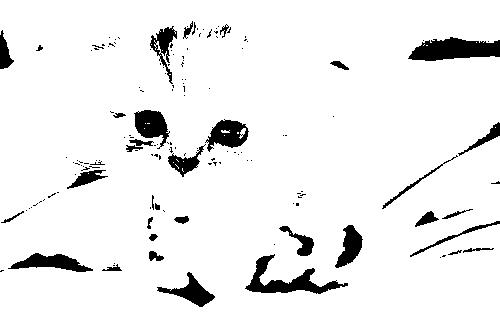

In [13]:
import base64
from io import BytesIO
imgdata = base64.b64decode(image_base64)
im = Image.open(BytesIO(imgdata))
im